<a href="https://colab.research.google.com/github/Mugunthan98/Assignment/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST


# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image



y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
print("w:", w.shape)
print("b:", b.shape)
batch_size = Ntr


iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  x=x_train[indices]
  y=y_train[indices]

  # Forward pass
  y_pred=x.dot(w)+b
  loss=1/batch_size*np.square(y_pred-y).sum()+reg*np.sum(w*w)
  loss_history.append(loss)
  acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y,axis=1)-np.argmax(y_pred,axis=1))))/Ntr
  train_acc_history.append(acc)


  if t%10==0:
    print('iteration %d/%d : loss %f'%(t,iterations,loss))
    print('iteration %d/%d : training accuracy %f'%(t,iterations,acc))


  # Backward pass
  dy_pred=1./batch_size*2.0*(y_pred-y)
  db=dy_pred.sum()
  dw=x.T.dot(dy_pred)+reg*w
  w-=lr*dw
  b-=lr*db
  lr*=lr_decay



x_train:  (50000, 32, 32, 3)
w: (3072, 10)
b: (10,)
iteration 0/300 : loss 1.000000
iteration 0/300 : training accuracy 0.094360
iteration 10/300 : loss 0.819974
iteration 10/300 : training accuracy 0.354260
iteration 20/300 : loss 0.810083
iteration 20/300 : training accuracy 0.372660
iteration 30/300 : loss 0.804966
iteration 30/300 : training accuracy 0.382060
iteration 40/300 : loss 0.801613
iteration 40/300 : training accuracy 0.388220
iteration 50/300 : loss 0.799166
iteration 50/300 : training accuracy 0.392940
iteration 60/300 : loss 0.797249
iteration 60/300 : training accuracy 0.396060
iteration 70/300 : loss 0.795674
iteration 70/300 : training accuracy 0.398720
iteration 80/300 : loss 0.794337
iteration 80/300 : training accuracy 0.401020
iteration 90/300 : loss 0.793178
iteration 90/300 : training accuracy 0.402880
iteration 100/300 : loss 0.792157
iteration 100/300 : training accuracy 0.404660
iteration 110/300 : loss 0.791246
iteration 110/300 : training accuracy 0.40594

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

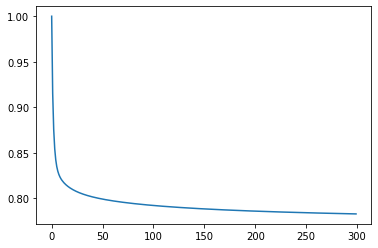

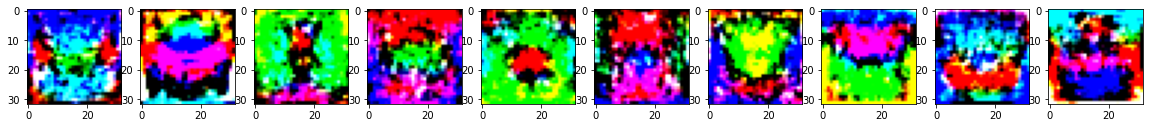

train_accuracy =  0.41938
test_accuracy =  0.4057


In [ ]:

# Printing accuracies and displaying w as images
plt.plot(loss_history)
fig,ax=plt.subplots(1,10)
fig.set_size_inches(20,10)

for i in range(10):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

y_pred1=x_train.dot(w1)+b1
train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))))/Ntr
print('train_accuracy = ',train_acc)


y_pred2=x_test.dot(w1)+b1
test_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
print('test_accuracy = ',test_acc)






In [ ]:
#Training Loss 
print(1/Ntr*np.square(y_pred1-y_train).sum()+reg*np.sum(w1*w1))

0.7828775903792239


In [ ]:
#Testing Loss
print(1/Nte*np.square(y_pred2-y_test).sum()+reg*np.sum(w1*w1))

0.7876049867388403


In [2]:
#Question2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST


# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image



y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
batch_size=Ntr


iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

for t in range(iterations):
  batch_indices = np.random.choice(Ntr,batch_size)
  x=x_train[batch_indices]
  y=y_train[batch_indices] 

  # Forward pass
  h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
  y_pred=h.dot(w2)+b2
  loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
  loss_history.append(loss)

  acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y,axis=1)-np.argmax(y_pred,axis=1))))/Ntr
  train_acc_history.append(acc)

  if t%10==0:
    print('iteration %d/%d : loss %f'%(t,iterations,loss))
    print('iteration %d/%d : training accuracy %f'%(t,iterations,acc))

  # Backward pass
  dy_pred=1./batch_size*2.0*(y_pred-y)
  dw2=h.T.dot(dy_pred)+reg*w2
  db2=dy_pred.sum(axis=0)
  dh=dy_pred.dot(w2.T)
  dw1=x.T.dot(dh*h*(1-h))+reg*w1
  db1=(dh*h*(1-h)).sum(axis=0)


  w1-=lr*dw1
  w2-=lr*dw2
  b1-=lr*db1
  b2-=lr*db2
  lr*=lr_decay 

x_train:  (50000, 32, 32, 3)
iteration 0/300 : loss 0.999999
iteration 0/300 : training accuracy 0.099300
iteration 10/300 : loss 0.995851
iteration 10/300 : training accuracy 0.104660
iteration 20/300 : loss 0.865169
iteration 20/300 : training accuracy 0.240800
iteration 30/300 : loss 0.839716
iteration 30/300 : training accuracy 0.296800
iteration 40/300 : loss 0.829618
iteration 40/300 : training accuracy 0.321680
iteration 50/300 : loss 0.817865
iteration 50/300 : training accuracy 0.335020
iteration 60/300 : loss 0.815679
iteration 60/300 : training accuracy 0.338880
iteration 70/300 : loss 0.807021
iteration 70/300 : training accuracy 0.358020
iteration 80/300 : loss 0.796239
iteration 80/300 : training accuracy 0.373980
iteration 90/300 : loss 0.795474
iteration 90/300 : training accuracy 0.376300
iteration 100/300 : loss 0.787731
iteration 100/300 : training accuracy 0.386380
iteration 110/300 : loss 0.791266
iteration 110/300 : training accuracy 0.376080
iteration 120/300 : l

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


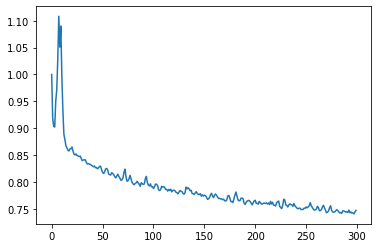

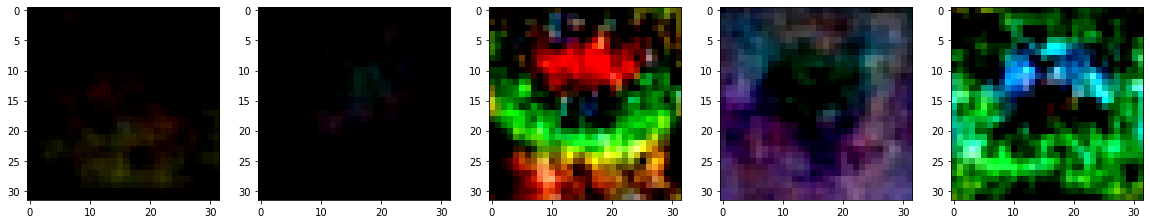

train_accuracy =  0.45586
test_accuracy =  0.4224


In [3]:
 # Printing accuracies and displaying w as images
plt.plot(loss_history)
fig,ax=plt.subplots(1,5)
fig.set_size_inches(20,10)

for i in range(5):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

h1=1.0/(1.0+np.exp(-(x_train.dot(w1)+b1))) #sigmoid
y_pred1=h1.dot(w2)+b2
train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))))/Ntr
print('train_accuracy = ',train_acc)


h2=1.0/(1.0+np.exp(-(x_test.dot(w1)+b1))) #sigmoid
y_pred2=h2.dot(w2)+b2
test_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
print('test_accuracy = ',test_acc)